In [1]:
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ipa_df = pd.read_csv('ipa-data.csv')
print(ipa_df.columns)
print(ipa_df.iloc[74,5])
ipa_df.iloc[74,5] = "postalveolar;velar"
ipa_symbols = list(ipa_df['Symbol'])

Index(['IPA_Number', 'Symbol', 'Symbol_Name', 'Description', 'Voicing',
       'Place_of_Articulation', 'Manner_of_Articulation', 'Height', 'Backness',
       'Rounding', 'Status', 'UCS_Code', 'AFII_Code'],
      dtype='object')
simultaneous postalveolar and velar


In [3]:
train_units_path = 'data_phdist/lang_1char/train_units.txt'
train_unit_file = codecs.open(train_units_path)
# lines = train_unit_file.readlines()

In [4]:
attr_list = []
symbols = []
symbol2attr = {
    '<blank>': ['<blank>'],
    '<unk>': ['<unk>'],
    '<space>': ['<space>'],
    '<sos/eos>': ['<sos/eos>'],
}
with codecs.open(train_units_path) as train_unit_file:
    for i, line in enumerate(train_unit_file):
        symbol, _ = line.strip().split(' ')
        symbols.append(symbol)
        if symbol not in ipa_symbols:
            print(symbol, 'Not Found')
        else:
            cur_df = ipa_df[ipa_df['Symbol']==symbol]
            symbol_attrs = []
            for attr_idx in [3, 4, 5, 6, 7, 8, 9]:
                cur_attr = cur_df.iloc[0,attr_idx]
                if isinstance(cur_attr, str):
                    cur_attr = cur_attr.replace('(','').replace(')','')
                    attrs = cur_attr.split(';') if ';' in cur_attr else [cur_attr]
                    symbol_attrs.extend(attrs)
            attr_list.extend(symbol_attrs)
            symbol2attr[symbol] = symbol_attrs
attr_list = list(set(attr_list))
symbols = ['<blank>'] + symbols + ['<sos/eos>']

<unk> Not Found
<space> Not Found


In [5]:
symbols

['<blank>',
 '<unk>',
 '<space>',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'æ',
 'ð',
 'ø',
 'ħ',
 'ŋ',
 'œ',
 'ǀ',
 'ǁ',
 'ǃ',
 'ɐ',
 'ɑ',
 'ɒ',
 'ɓ',
 'ɔ',
 'ɕ',
 'ɖ',
 'ɗ',
 'ə',
 'ɚ',
 'ɛ',
 'ɜ',
 'ɟ',
 'ɠ',
 'ɡ',
 'ɣ',
 'ɤ',
 'ɥ',
 'ɦ',
 'ɨ',
 'ɪ',
 'ɬ',
 'ɮ',
 'ɯ',
 'ɱ',
 'ɲ',
 'ɹ',
 'ɻ',
 'ɽ',
 'ɾ',
 'ʁ',
 'ʂ',
 'ʃ',
 'ʈ',
 'ʉ',
 'ʊ',
 'ʋ',
 'ʎ',
 'ʒ',
 'ʔ',
 'ʰ',
 'ʱ',
 'ʲ',
 'ʷ',
 'ʼ',
 'ˈ',
 'ː',
 '˥',
 '˦',
 '˧',
 '˨',
 '˩',
 '̃',
 '̝',
 '̤',
 'β',
 '<sos/eos>']

In [6]:
symbol2attr

{'<blank>': ['<blank>'],
 '<unk>': ['<unk>'],
 '<space>': ['<space>'],
 '<sos/eos>': ['<sos/eos>'],
 'a': ['open', 'front', 'unrounded'],
 'b': ['voiced', 'bilabial', 'plosive'],
 'c': ['voiceless', 'palatal', 'plosive'],
 'd': ['voiced', 'dental', 'alveolar', 'plosive'],
 'e': ['close-mid', 'front', 'unrounded'],
 'f': ['voiceless', 'labiodental', 'fricative'],
 'g': ['voiced', 'velar', 'plosive'],
 'h': ['voiceless', 'glottal', 'fricative'],
 'i': ['close', 'front', 'unrounded'],
 'j': ['voiced', 'palatal', 'approximant'],
 'k': ['voiceless', 'velar', 'plosive'],
 'l': ['voiced', 'dental', 'alveolar', 'lateral approximant'],
 'm': ['voiced', 'bilabial', 'nasal'],
 'n': ['voiced', 'dental', 'alveolar', 'nasal'],
 'o': ['close-mid', 'back', 'rounded'],
 'p': ['voiceless', 'bilabial', 'plosive'],
 'q': ['voiceless', 'uvular', 'plosive'],
 'r': ['voiced', 'dental', 'alveolar', 'trill'],
 's': ['voiceless', 'alveolar', 'fricative'],
 't': ['voiceless', 'dental', 'alveolar', 'plosive'],
 '

In [7]:
print(attr_list)
print(len(attr_list))

['front', 'postalveolar', 'high level', 'voiceless', 'tap', 'implosive', 'trill', 'click', 'alveolo-palatal', 'breathy voiced', 'open', 'labial-palatal', 'near-close', 'lateral fricative', 'back', 'unrounded', 'rounded', 'plosive', 'extra high level', 'palatal', 'retroflex', 'mid', 'low level', 'extra low level', 'approximant', 'R-coloured', 'velar', 'mid level', 'fricative', 'glottal', 'central', 'dental', 'pharyngeal', 'flap', 'nasal', 'raised', 'close', 'labiodental', 'primary stress', 'uvular', 'labialized', 'ejective', 'long', 'open-mid', 'near-open', 'alveolar', 'lateral approximant', 'nasalized', 'labial-velar', 'near-back', 'near-front', 'aspirated', 'close-mid', 'lateral click', 'palatalized', 'bilabial', 'voiced']
57


In [8]:
print(attr_list)
print(len(attr_list))

['front', 'postalveolar', 'high level', 'voiceless', 'tap', 'implosive', 'trill', 'click', 'alveolo-palatal', 'breathy voiced', 'open', 'labial-palatal', 'near-close', 'lateral fricative', 'back', 'unrounded', 'rounded', 'plosive', 'extra high level', 'palatal', 'retroflex', 'mid', 'low level', 'extra low level', 'approximant', 'R-coloured', 'velar', 'mid level', 'fricative', 'glottal', 'central', 'dental', 'pharyngeal', 'flap', 'nasal', 'raised', 'close', 'labiodental', 'primary stress', 'uvular', 'labialized', 'ejective', 'long', 'open-mid', 'near-open', 'alveolar', 'lateral approximant', 'nasalized', 'labial-velar', 'near-back', 'near-front', 'aspirated', 'close-mid', 'lateral click', 'palatalized', 'bilabial', 'voiced']
57


In [9]:
desc = []
voicing = []
place = []
manner = []
height = []
back = []
rounding = []

for attr in attr_list:
    if attr in list(ipa_df['Voicing']):
        voicing.append(attr)
    if attr in list(ipa_df['Place_of_Articulation']):
        place.append(attr)
    if attr in list(ipa_df['Manner_of_Articulation']):
        manner.append(attr)
    if attr in list(ipa_df['Height']):
        height.append(attr)
    if attr in list(ipa_df['Backness']):
        back.append(attr)
    if attr in list(ipa_df['Rounding']):
        rounding.append(attr)
    if attr in list(ipa_df['Description']):
        desc.append(attr)
        

if 'nasal' in place:
    place.remove('nasal')
    
if 'dental' in desc:
    desc.remove('dental')

attr_list_sorted = voicing + place + manner + height + back + rounding + desc
attr_list_sorted.append('aspirated voiced')

In [10]:
non_lang = ['<blank>', '<unk>','<space>']
attr_list_sorted = non_lang + attr_list_sorted + ['<sos/eos>']
print(attr_list_sorted)

['<blank>', '<unk>', '<space>', 'voiceless', 'voiced', 'postalveolar', 'alveolo-palatal', 'labial-palatal', 'palatal', 'retroflex', 'velar', 'glottal', 'dental', 'pharyngeal', 'labiodental', 'uvular', 'alveolar', 'labial-velar', 'bilabial', 'tap', 'implosive', 'trill', 'click', 'lateral fricative', 'plosive', 'approximant', 'fricative', 'flap', 'nasal', 'ejective', 'lateral approximant', 'lateral click', 'open', 'near-close', 'mid', 'close', 'open-mid', 'near-open', 'close-mid', 'front', 'back', 'central', 'near-back', 'near-front', 'unrounded', 'rounded', 'high level', 'breathy voiced', 'extra high level', 'low level', 'extra low level', 'R-coloured', 'mid level', 'raised', 'primary stress', 'labialized', 'long', 'nasalized', 'aspirated', 'palatalized', 'aspirated voiced', '<sos/eos>']


In [11]:
n_symbol = len(symbols)
n_attr = len(attr_list_sorted)
embeddings = np.zeros((n_symbol, n_attr))

for i, symbol in enumerate(symbols):
    attr_index = [attr_list_sorted.index(attr) for attr in symbol2attr[symbol]]
    embeddings[i, attr_index] = 1

In [13]:
embeddings.shape

(95, 62)

In [14]:
np.save('data_phdist/signature', embeddings)

In [127]:
sim_mat = cosine_similarity(embeddings)

In [133]:
sim_mat[symbols.index('t'), symbols.index('b')]

0.2886751345948129

In [144]:
sim_mat_nml = sim_mat / np.sum(sim_mat, axis=0).reshape(-1, 1)

In [156]:
# np.save('data_phdist/sim_mat_nml', sim_mat_nml)

In [149]:
sim_mat_nml[3]

array([0.        , 0.        , 0.        , 0.13636364, 0.        ,
       0.        , 0.        , 0.09090909, 0.        , 0.        ,
       0.        , 0.09090909, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04545455, 0.        , 0.09090909,
       0.        , 0.04545455, 0.        , 0.        , 0.04545455,
       0.        , 0.        , 0.        , 0.        , 0.09090909,
       0.04545455, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09090909, 0.04545455,
       0.        , 0.        , 0.        , 0.        , 0.04545455,
       0.        , 0.        , 0.04545455, 0.04545455, 0.        ,
       0.        , 0.04545455, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [155]:
symbols[3]

'a'

In [154]:
symbol2attr[symbols[3]]

['open', 'front', 'unrounded']

In [7]:
attr_list_sorted

['<blank>',
 '<unk>',
 '<space>',
 'voiced',
 'voiceless',
 'pharyngeal',
 'retroflex',
 'labiodental',
 'dental',
 'bilabial',
 'glottal',
 'velar',
 'alveolo-palatal',
 'labial-palatal',
 'uvular',
 'labial-velar',
 'postalveolar',
 'palatal',
 'alveolar',
 'implosive',
 'lateral fricative',
 'plosive',
 'lateral click',
 'ejective',
 'approximant',
 'tap',
 'click',
 'nasal',
 'trill',
 'lateral approximant',
 'flap',
 'fricative',
 'mid',
 'open-mid',
 'near-open',
 'close-mid',
 'open',
 'close',
 'near-close',
 'near-front',
 'near-back',
 'back',
 'central',
 'front',
 'unrounded',
 'rounded',
 'palatalized',
 'aspirated',
 'raised',
 'high level',
 'extra low level',
 'primary stress',
 'low level',
 'nasalized',
 'R-coloured',
 'mid level',
 'breathy voiced',
 'labialized',
 'extra high level',
 'long',
 'aspirated voiced',
 '<sos/eos>']

In [50]:
attr_mat.shape

(62, 95)

In [56]:
nattr, nsym = attr_mat.shape
nattr, nsym

(62, 95)

In [64]:
eps = 1e-5
attr_mat_smooth = attr_mat + eps

In [ ]:

sim_mat = np.zeros((nsym,nsym))
for si in range(nsym):
    for sj in range(nsym):
        vi = attr_mat[:,sj]
        vj = attr_mat[:,si]
        sim_mat =

In [69]:
sim_mat = cosine_similarity(attr_mat_smooth.T)

In [71]:
sim_mat.max(), sim_mat.min()

(1.0000000000000002, 2.0001666591998e-05)

In [78]:
np.unique(1-sim_mat)

array([-2.22044605e-16,  0.00000000e+00,  1.11022302e-16,  2.22044605e-16,
        2.22044605e-15,  2.33146835e-15,  1.83499336e-01,  2.49995000e-01,
        2.49995000e-01,  2.92886147e-01,  3.33326666e-01,  3.33326666e-01,
        4.22638183e-01,  4.22638183e-01,  4.22638183e-01,  4.22641070e-01,
        4.22641070e-01,  4.22641070e-01,  4.22641070e-01,  4.22641070e-01,
        4.99984999e-01,  4.99989999e-01,  4.99989999e-01,  4.99989999e-01,
        5.91739461e-01,  6.46432466e-01,  6.46432466e-01,  6.46432466e-01,
        6.66653332e-01,  6.66653332e-01,  6.66653332e-01,  7.11310431e-01,
        7.11310431e-01,  7.11310431e-01,  7.11310431e-01,  9.99974997e-01,
        9.99976903e-01,  9.99978783e-01,  9.99978785e-01,  9.99979585e-01,
        9.99979791e-01,  9.99979994e-01,  9.99979997e-01,  9.99979998e-01])

In [85]:
diff_mat = 1-sim_mat
# diff_mat = diff_mat - np.min(diff_mat)

In [87]:
np.where(diff_mat==np.min(diff_mat))

(array([82]), array([82]))

In [86]:
diff_mat[diff_mat==np.min(diff_mat)]

array([-2.22044605e-16])

In [92]:
diff_mat[diff_mat<0] = 0
diff_mat

array([[0.00000000e+00, 9.99979994e-01, 9.99979994e-01, ...,
        9.99979994e-01, 9.99976903e-01, 9.99979994e-01],
       [9.99979994e-01, 0.00000000e+00, 9.99979994e-01, ...,
        9.99979994e-01, 9.99976903e-01, 9.99979994e-01],
       [9.99979994e-01, 9.99979994e-01, 0.00000000e+00, ...,
        9.99979994e-01, 9.99976903e-01, 9.99979994e-01],
       ...,
       [9.99979994e-01, 9.99979994e-01, 9.99979994e-01, ...,
        1.11022302e-16, 9.99976903e-01, 9.99979994e-01],
       [9.99976903e-01, 9.99976903e-01, 9.99976903e-01, ...,
        9.99976903e-01, 0.00000000e+00, 9.99976903e-01],
       [9.99979994e-01, 9.99979994e-01, 9.99979994e-01, ...,
        9.99979994e-01, 9.99976903e-01, 2.22044605e-16]])

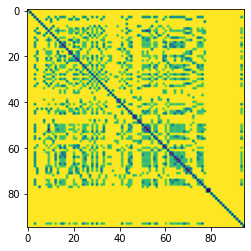

In [94]:
plt.imshow(diff_mat)

In [96]:
np.save('data_phdist/dist_mat', diff_mat)


In [54]:
attr_list_sorted

['<blank>',
 '<unk>',
 '<space>',
 'voiced',
 'voiceless',
 'glottal',
 'alveolo-palatal',
 'alveolar',
 'postalveolar',
 'uvular',
 'velar',
 'retroflex',
 'labial-palatal',
 'palatal',
 'pharyngeal',
 'labial-velar',
 'dental',
 'bilabial',
 'labiodental',
 'plosive',
 'ejective',
 'lateral click',
 'lateral approximant',
 'click',
 'flap',
 'trill',
 'approximant',
 'implosive',
 'tap',
 'nasal',
 'lateral fricative',
 'fricative',
 'mid',
 'near-close',
 'close',
 'close-mid',
 'open',
 'open-mid',
 'near-open',
 'near-front',
 'near-back',
 'front',
 'back',
 'central',
 'unrounded',
 'rounded',
 'high level',
 'extra low level',
 'nasalized',
 'long',
 'R-coloured',
 'low level',
 'extra high level',
 'primary stress',
 'breathy voiced',
 'palatalized',
 'mid level',
 'labialized',
 'aspirated',
 'raised',
 'aspirated voiced',
 '<sos/eos>']

In [7]:
print(attr_list_sorted)

['<blank>', '<unk>', '<hes>', '<noise>', '<silence>', '<space>', '<v-noise>', 'voiced', 'voiceless', 'dental', 'bilabial', 'palatal', 'velar', 'postalveolar', 'uvular', 'alveolo-palatal', 'labiodental', 'labial-velar', 'retroflex', 'pharyngeal', 'alveolar', 'glottal', 'trill', 'flap', 'click', 'lateral fricative', 'lateral click', 'ejective', 'lateral approximant', 'fricative', 'approximant', 'plosive', 'nasal', 'implosive', 'close-mid', 'mid', 'near-close', 'near-open', 'open-mid', 'open', 'close', 'near-back', 'central', 'front', 'back', 'near-front', 'unrounded', 'rounded', 'palatalized', 'aspirated', 'low level', 'nasalized', 'long', 'extra high level', 'mid level', 'breathy voiced', 'extra low level', 'labialized', 'primary stress', 'aspirated voiced', '<sos/eos>']


In [33]:

#       'Description', 'Voicing',
#       'Place_of_Articulation', 'Manner_of_Articulation', 'Height', 'Backness',
#       'Rounding'

desc = []
voicing = []
place = []
manner = []
height = []
back = []
rounding = []

for attr in attr_list:
    if attr in list(ipa_df['Voicing']):
        voicing.append(attr)
    if attr in list(ipa_df['Place_of_Articulation']):
        place.append(attr)
    if attr in list(ipa_df['Manner_of_Articulation']):
        manner.append(attr)
    if attr in list(ipa_df['Height']):
        height.append(attr)
    if attr in list(ipa_df['Backness']):
        back.append(attr)
    if attr in list(ipa_df['Rounding']):
        rounding.append(attr)
    if attr in list(ipa_df['Description']):
        desc.append(attr)

place.pop(place.index('nasal'))
desc.pop(desc.index('dental'))
attr_list_sorted = voicing + place + manner + height + back + rounding + desc
attr_list_sorted.append('aspirated voiced')


non_lang = ['<blank>','<unk>','<hes>','<noise>','<silence>','<space>','<v-noise>']

attr_list_sorted = non_lang + attr_list_sorted + ['<sos/eos>']
print(attr_list_sorted)

train_units_path = 'data/lang_1char/train_units.txt'
train_unit_file = codecs.open(train_units_path)
lines = train_unit_file.readlines()

symbol_dict = {}
symbol_dict[0] = [attr_list_sorted.index('<blank>')]
for item_idx in range(len(lines)):
    print(f'item_idx {item_idx}')
    symbol_dict[item_idx + 1] = []
    if item_idx >= 6:
        item = lines[item_idx]
        item = item.replace('\n','').split()
        if len(ipa_df[ipa_df['Symbol'] == item[0]]) == 0:
            print(item, 'Not Found')
            symbol_dict[item_idx + 1].append(attr_list_sorted.index('aspirated voiced'))
        else:
            cur_df = ipa_df[ipa_df['Symbol'] == item[0]]
            for attr_idx in [3, 4, 5, 6, 7, 8, 9]:
                cur_attr = cur_df.iloc[0,attr_idx]
                if (isinstance(cur_attr,str)):
                    if ';' in cur_attr:
                        attrs = cur_attr.split(';')
                        for attr in attrs:
                            symbol_dict[item_idx + 1].append(attr_list_sorted.index(attr))
                    else:
                        if '(' in cur_attr:
                            cur_attr = cur_attr.replace('(','')
                            cur_attr = cur_attr.replace(')','')
                        symbol_dict[item_idx + 1].append(attr_list_sorted.index(cur_attr))
        print(item)
        for idx in symbol_dict[item_idx + 1]:
            print(attr_list_sorted[idx])
    else:
        symbol_dict[item_idx + 1].append(item_idx + 1)

item_idx += 1
for item in ['ɑ', 'ɤ', 'ɯ', 'q']:
    print(f'item_idx {item_idx}')
    symbol_dict[item_idx + 1] = []
    cur_df = ipa_df[ipa_df['Symbol'] == item]
    for attr_idx in [3, 4, 5, 6, 7, 8, 9]:
        cur_attr = cur_df.iloc[0,attr_idx]
#         print(cur_df.iloc[0,attr_idx])
        if (isinstance(cur_attr,str)):
            if ';' in cur_attr:
                attrs = cur_attr.split(';')
                for attr in attrs:
                    symbol_dict[item_idx + 1].append(attr_list_sorted.index(attr))
            else:
                if '(' in cur_attr:
                    cur_attr = cur_attr.replace('(','')
                    cur_attr = cur_attr.replace(')','')
                symbol_dict[item_idx + 1].append(attr_list_sorted.index(cur_attr))
    for idx in symbol_dict[item_idx + 1]:
        print(attr_list_sorted[idx])
    item_idx += 1
    
    
#     print(item)
# esos/eos
print(symbol_dict)
symbol_dict[len(symbol_dict)] = [attr_list_sorted.index('<sos/eos>')]


print(symbol_dict)

attr_mat = np.zeros((len(attr_list_sorted),len(symbol_dict)))

for symbol_idx in symbol_dict.keys():
    attr_mat[symbol_dict[symbol_idx], symbol_idx] = 1
    
np.save('complete_arti_attr_mat.npy',attr_mat)

['<blank>', '<unk>', '<hes>', '<noise>', '<silence>', '<space>', '<v-noise>', 'voiced', 'voiceless', 'dental', 'bilabial', 'palatal', 'velar', 'postalveolar', 'uvular', 'alveolo-palatal', 'labiodental', 'labial-velar', 'retroflex', 'pharyngeal', 'alveolar', 'glottal', 'trill', 'flap', 'click', 'lateral fricative', 'lateral click', 'ejective', 'lateral approximant', 'fricative', 'approximant', 'plosive', 'nasal', 'implosive', 'close-mid', 'mid', 'near-close', 'near-open', 'open-mid', 'open', 'close', 'near-back', 'central', 'front', 'back', 'near-front', 'unrounded', 'rounded', 'palatalized', 'aspirated', 'low level', 'nasalized', 'long', 'extra high level', 'mid level', 'breathy voiced', 'extra low level', 'labialized', 'primary stress', 'aspirated voiced', '<sos/eos>']
item_idx 0
item_idx 1
item_idx 2
item_idx 3
item_idx 4
item_idx 5
item_idx 6
['a', '7']
open
front
unrounded
item_idx 7
['b', '8']
voiced
bilabial
plosive
item_idx 8
['c', '9']
voiceless
palatal
plosive
item_idx 9
['d',

In [ ]:
symbol_dict

In [32]:
len(symbol_dict)

84

In [30]:
attr_mat.shape

(61, 83)